In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.preprocessing import StandardScaler

In [3]:
data = np.array([
    [25, 15000], 
    [28, 16000],
    [30, 18000],
    [35, 22000],
    [40, 25000],
    [45, 60000],
    [50, 65000],
    [55, 70000]
])

In [5]:
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data)

In [11]:
hierarchical_cluster = AgglomerativeClustering(
    n_clusters=3, 
    linkage='ward'
)

In [13]:
cluster_labels = hierarchical_cluster.fit_predict(data_scaled)
print("Cluster Labels:", cluster_labels)

Cluster Labels: [2 2 2 1 1 0 0 0]


In [15]:
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.datasets import make_blobs

In [17]:
X, _ = make_blobs(n_samples=10, centers=3, random_state=42)

In [19]:
linkage_matrix = linkage(X, method='ward')

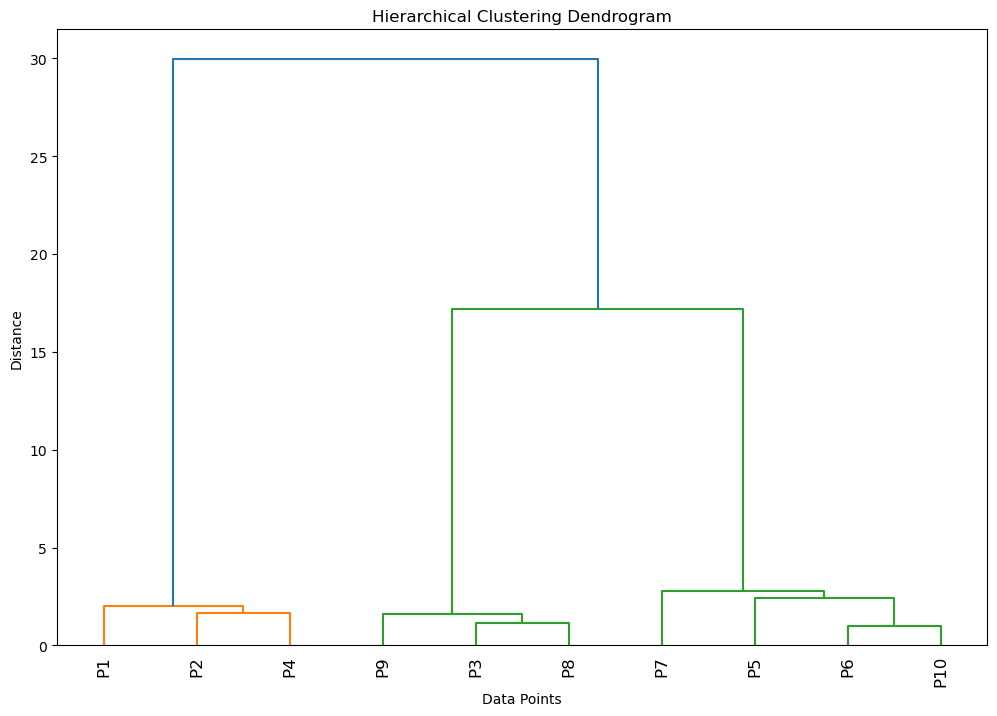

In [21]:
plt.figure(figsize=(12, 8))
dendrogram(
    linkage_matrix,
    labels=['P1', 'P2', 'P3', 'P4', 'P5', 'P6', 'P7', 'P8', 'P9', 'P10'],
    leaf_rotation=90,
    leaf_font_size=12
)
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Data Points')
plt.ylabel('Distance')
plt.show()

In [23]:
from scipy.cluster.hierarchy import fcluster
clusters = fcluster(linkage_matrix, t=3, criterion='maxclust')
print("Cluster assignments:", clusters)

Cluster assignments: [1 1 2 1 3 3 3 2 2 3]


In [25]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import AgglomerativeClustering
from sklearn.preprocessing import StandardScaler
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster

In [27]:
np.random.seed(42)
n_customers = 100

In [29]:
data = pd.DataFrame({
    'Age': np.random.normal(40, 15, n_customers),
    'Income': np.random.normal(50000, 20000, n_customers),
    'SpendingScore': np.random.normal(50, 25, n_customers)
})

In [31]:
data = data[(data['Age'] > 0) & (data['Income'] > 0) & 
            (data['SpendingScore'] >= 0) & (data['SpendingScore'] <= 100)]

print("Dataset shape:", data.shape)
print(data.head())

Dataset shape: (93, 3)
         Age        Income  SpendingScore
0  47.450712  21692.585159      58.944684
1  37.926035  41587.093545      64.019613
2  49.715328  43145.709669      77.076281
3  62.845448  33954.454616      76.345051
4  36.487699  46774.285767      15.558266


In [33]:
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data)

In [35]:
linkage_matrix = linkage(data_scaled, method='ward')

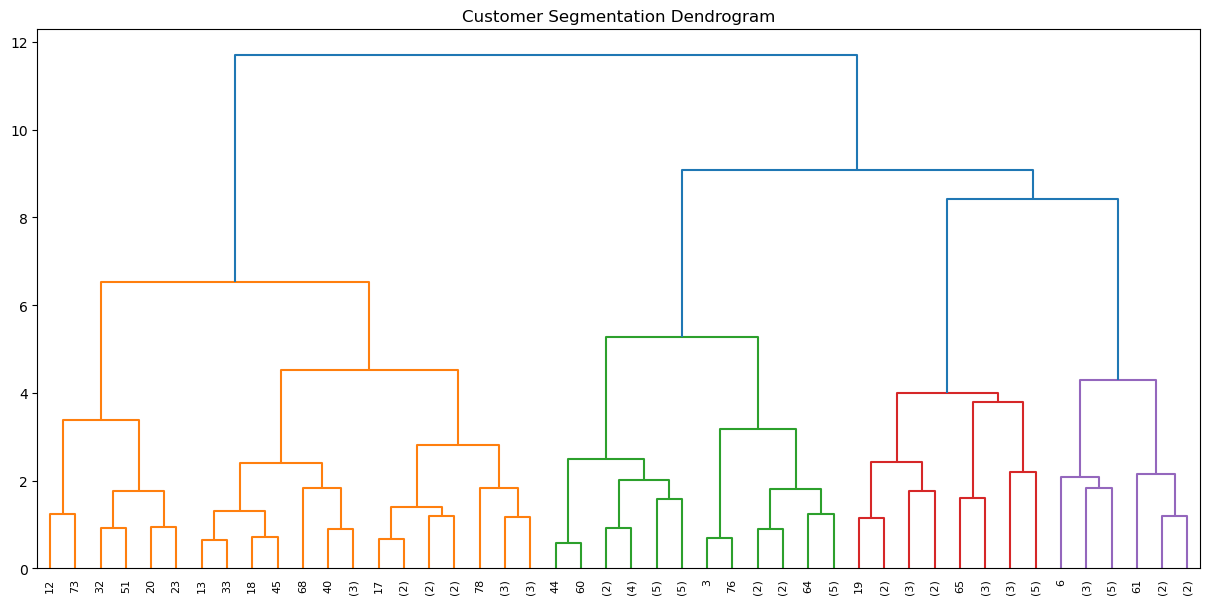

In [37]:
plt.figure(figsize=(15, 7))
dendrogram(linkage_matrix, truncate_mode='level', p=5)
plt.title('Customer Segmentation Dendrogram')
plt.show()

In [39]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns

In [41]:
data=pd.DataFrame({
    'Annual_Income':[15,40,70,90,25,60,85,45,55,100],
    'Spending_Score':[39,81,6,77,40,65,58,49,50,80]
})    

In [43]:
scaler = StandardScaler()
scaled_data = scaler.fit_transform(data)

In [47]:
kmeans = KMeans(n_clusters=3, random_state=42)
data['Segment'] = kmeans.fit_predict(scaled_data)

C:\Users\ishik\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


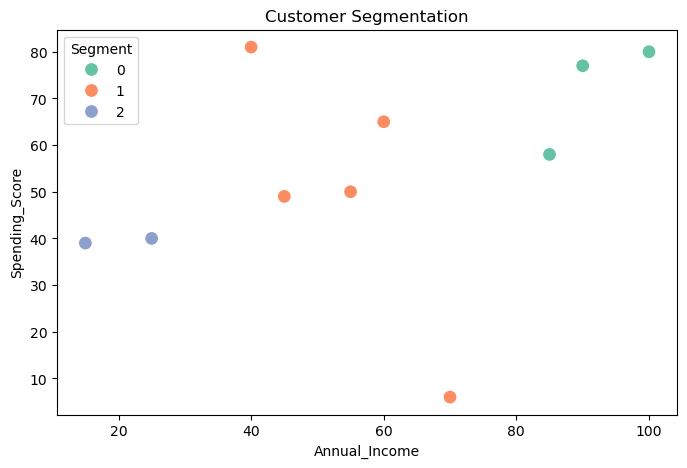

In [49]:
plt.figure(figsize=(8, 5))
sns.scatterplot(data=data, x='Annual_Income', y='Spending_Score', hue='Segment', palette='Set2', s=100)
plt.title('Customer Segmentation')
plt.show()